In [63]:
!pip install plotly
!pip install -U scikit-learn

You should consider upgrading via the 'c:\akhand\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\akhand\python.exe -m pip install --upgrade pip' command.


In [81]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('world happiness report.csv')

In [116]:
type(df)

pandas.core.frame.DataFrame

In [117]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [74]:
# to cheak for missing value
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Category                         0
dtype: int64

# Data visualiztion

In [8]:
# Highlighting the maximum values of each attribute in the data set
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587000,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,Iceland,Western Europe,2,7.561000,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,Denmark,Western Europe,3,7.527000,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,Norway,Western Europe,4,7.522000,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,Canada,North America,5,7.427000,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
5,Finland,Western Europe,6,7.406000,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550
6,Netherlands,Western Europe,7,7.378000,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700
7,Sweden,Western Europe,8,7.364000,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190
8,New Zealand,Australia and New Zealand,9,7.286000,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250
9,Australia,Australia and New Zealand,10,7.284000,0.040830,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460


In [10]:
# to get to detail about shape
df.shape

(158, 12)

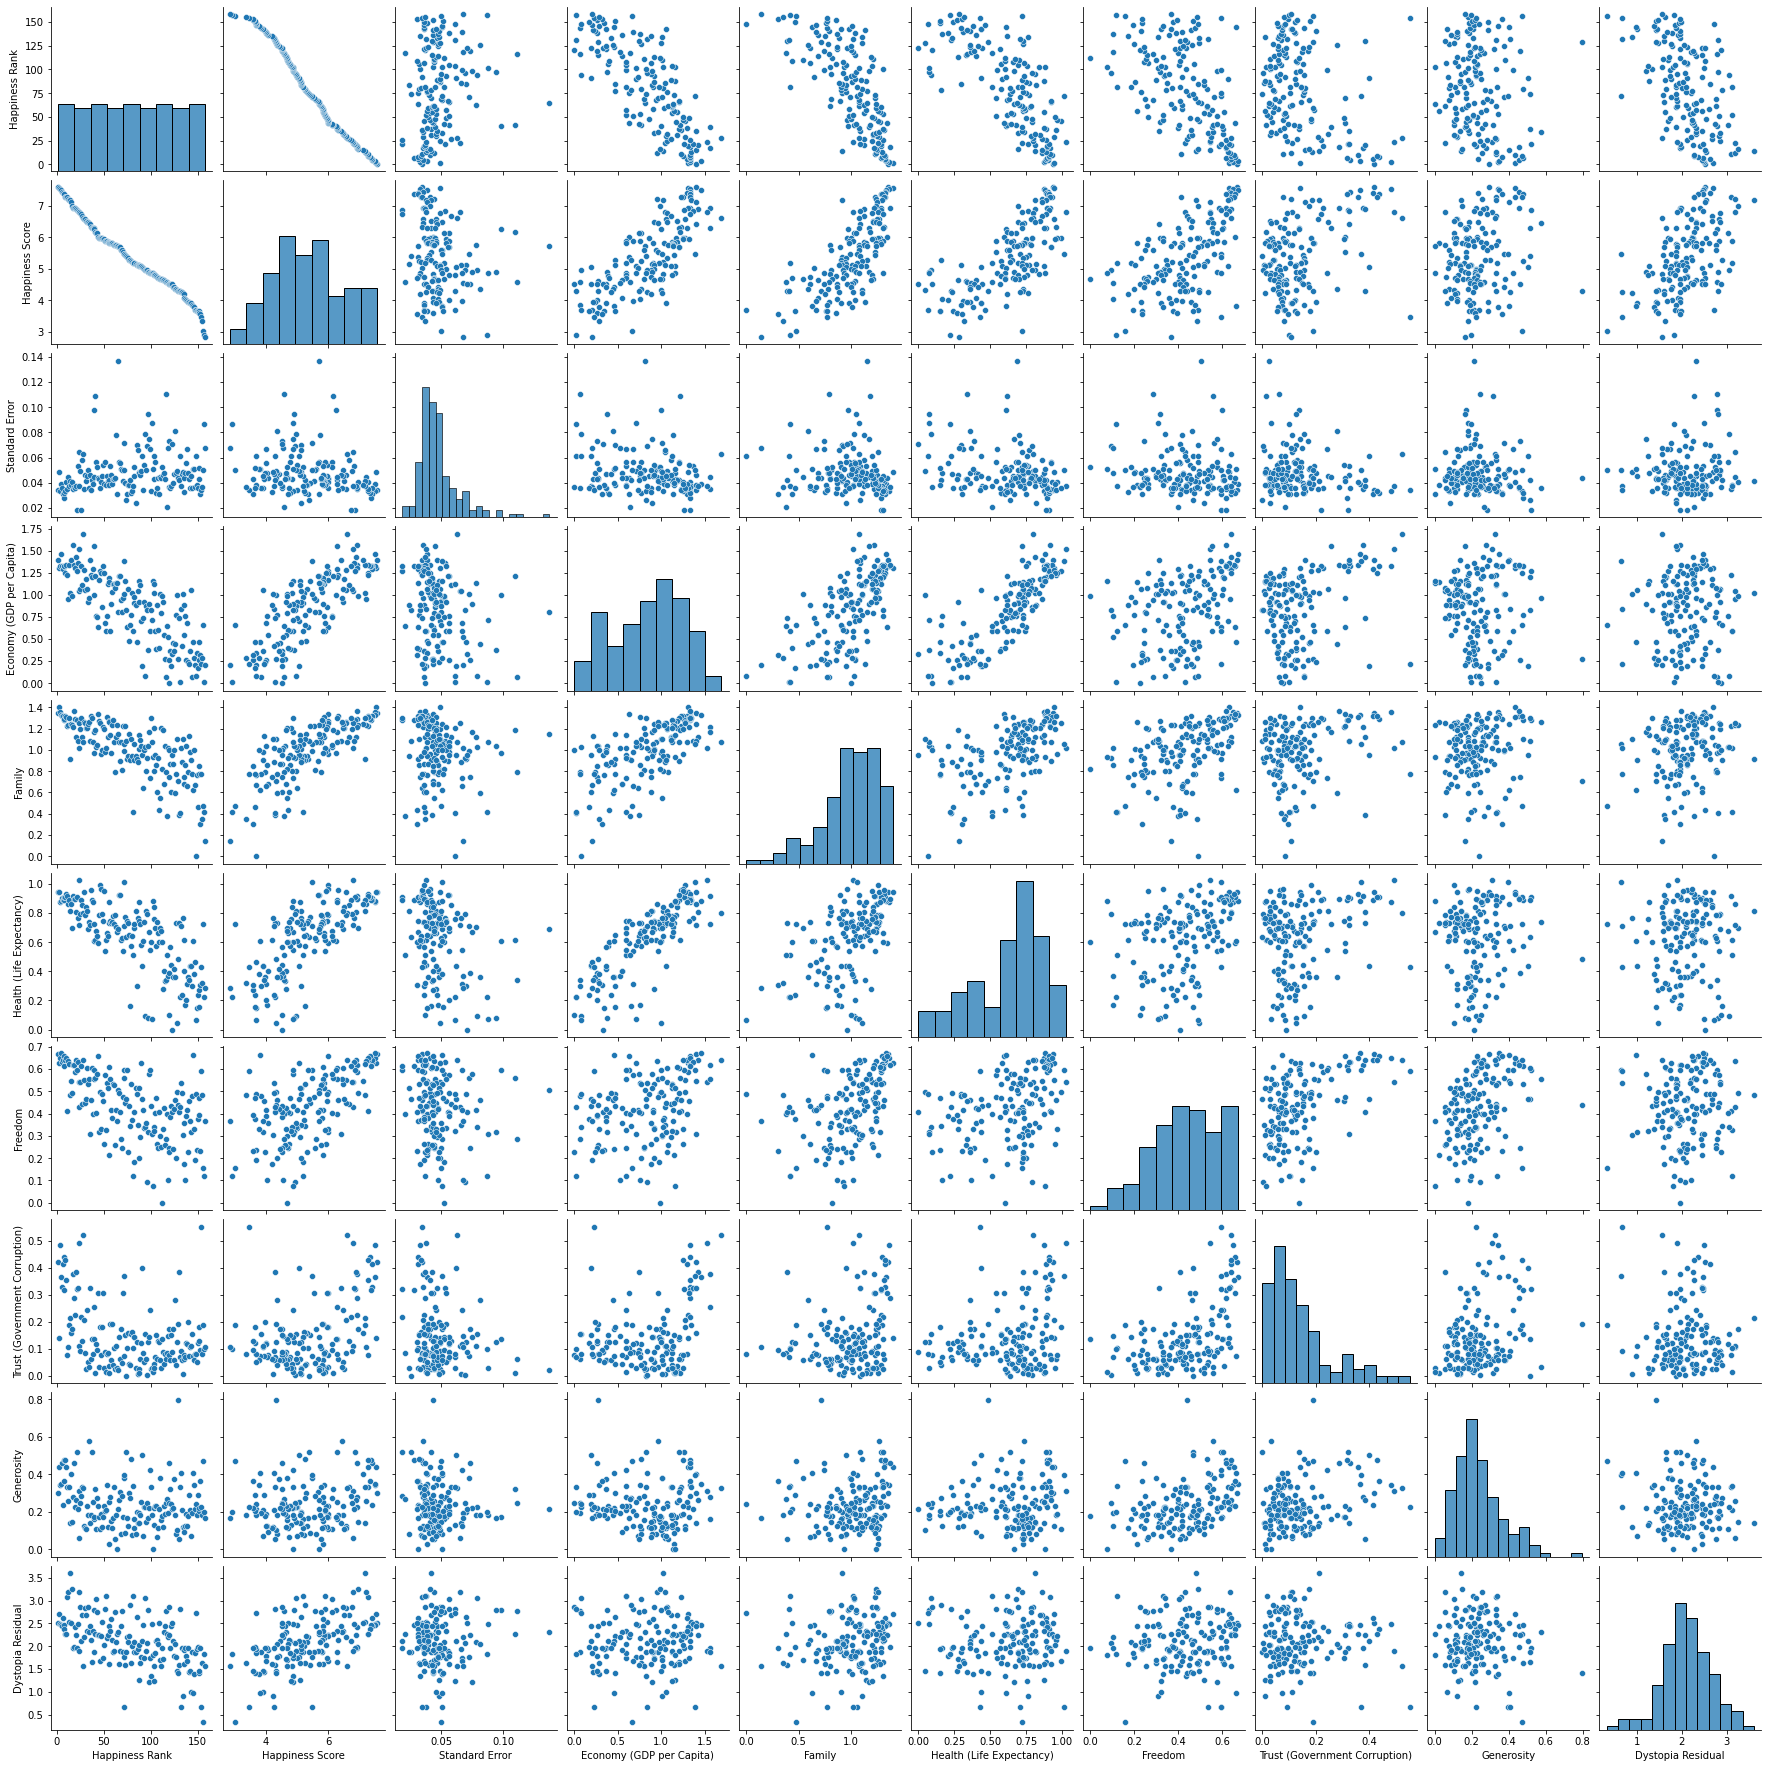

In [14]:
# Plotting pairwise relationships in the data set 
sns.pairplot(df)

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

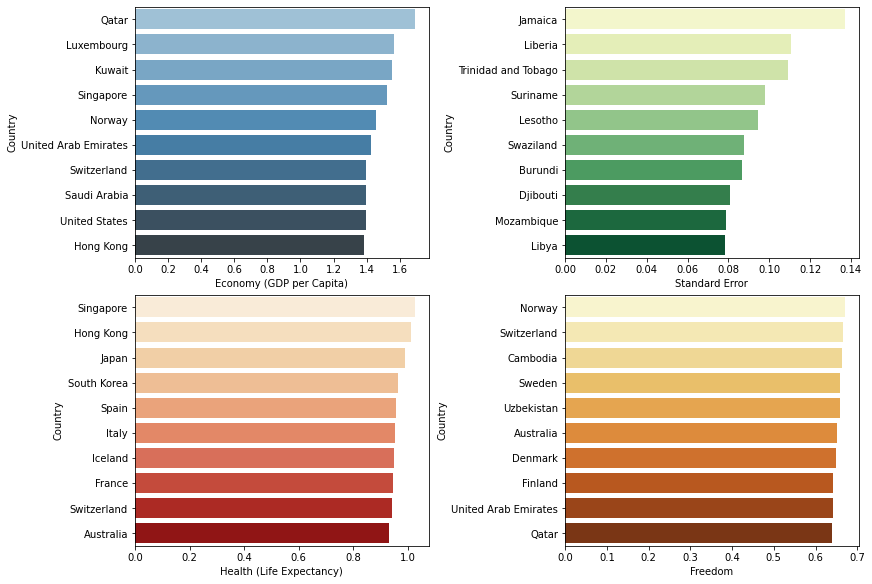

In [23]:
#Top 10 countries for each attribute
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy (GDP per Capita)',y='Country',data=df.nlargest(10,'Economy (GDP per Capita)'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Standard Error' ,y='Country',data=df.nlargest(10,'Standard Error'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

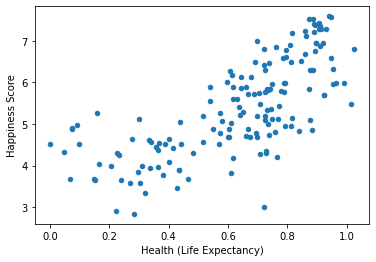

In [68]:
# healthy life expectancy affect the happiness
df.plot.scatter(x= 'Health (Life Expectancy)', y='Happiness Score')

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

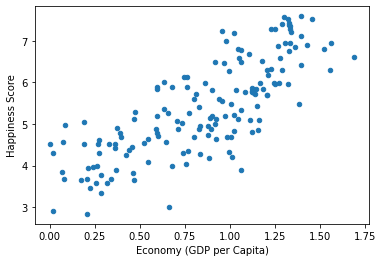

In [69]:
# GDP affect the happiness 
df.plot.scatter(x= 'Economy (GDP per Capita)', y='Happiness Score')

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

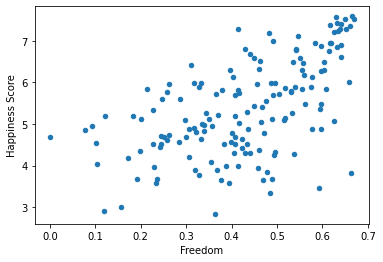

In [70]:
#freedom affect the happiness
df.plot.scatter(x= 'Freedom', y='Happiness Score')

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

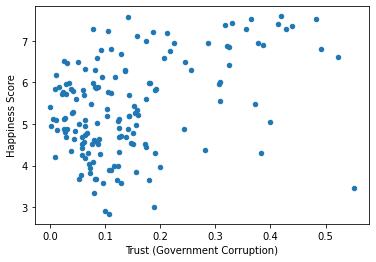

In [71]:
#  perception of corruption affect happiness
df.plot.scatter(x= 'Trust (Government Corruption)', y='Happiness Score')

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

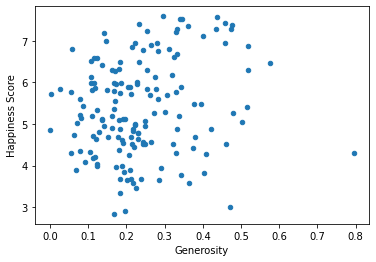

In [72]:
# generosity affect happiness
df.plot.scatter(x= 'Generosity', y='Happiness Score')

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

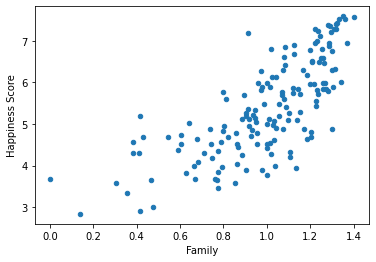

In [73]:
#  Family affect happiness
df.plot.scatter(x= 'Family', y='Happiness Score')

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Country'>

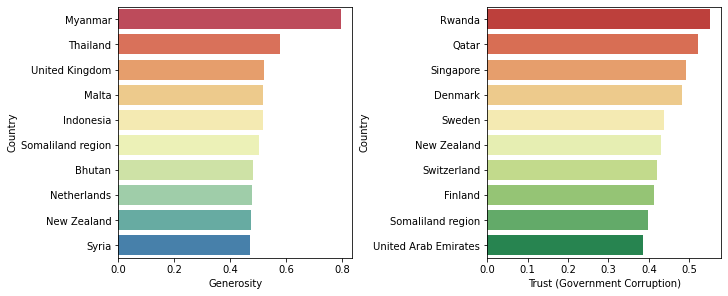

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',data=df.nlargest(10,'Trust (Government Corruption)'),ax=axes[1],palette='RdYlGn')

In [82]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [83]:
#  Geographic Visualization of Happiness Score
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# Adding column based on category

In [118]:
#  Now I want to give a category to each country as High,Mid and Low according to their happiness scores.
#  Thus we have to find out the bound in which these categories shall lie in.

print('max:',df['Happiness Score'].max())
print('min:',df['Happiness Score'].min())
add=df['Happiness Score'].max()-df['Happiness Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.587
min: 2.839
range difference: 1.583


In [119]:
low=df['Happiness Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Happiness Score'].max())

upper bound of Low grp 4.422
upper bound of Mid grp 6.005
upper bound of High grp max: 7.587


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [121]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [122]:
# Finally adding a new column Category to the data set and distributing the levels High,Low,Mid.
def  cat(row):
   if row['Happiness Score'] >0  and row['Happiness Score'] <low :
      return 'Low'
   if row['Happiness Score']>low and row['Happiness Score']<mid:
      return 'Mid'
   if row['Happiness Score']>mid  :
      return 'High' 

In [123]:
df['Category'] = df.apply (lambda row: cat(row), axis=1)

In [124]:
# now we can get dataframe with updated column
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Category
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Low
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Low
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Low
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Low


# Correlation with target feature

In [79]:
df.corr()['Happiness Score']

Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [76]:
# normal correltion 
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


correlation using heatmap

<AxesSubplot:>

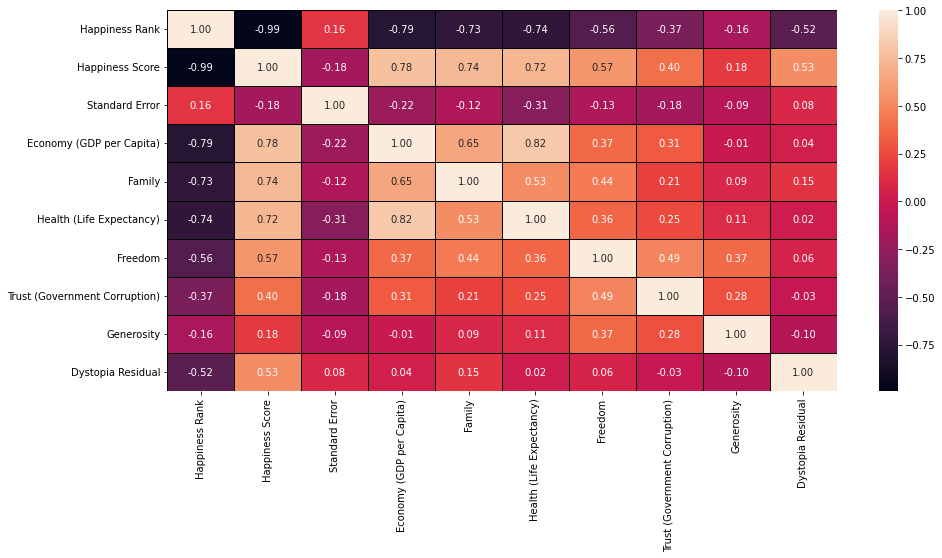

In [80]:
#size of canvas
plt.figure(figsize =(15,7))
sns.heatmap(df.corr(),annot = True ,linewidths = 0.5,linecolor = 'black' , fmt = '.2f')

# Outliers

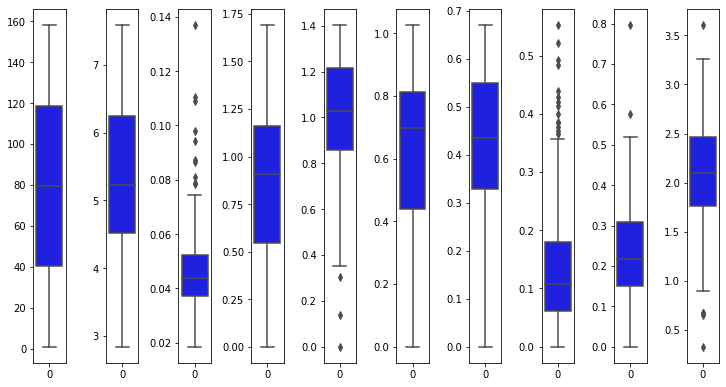

In [89]:
collist = df.columns.values
ncol=30
nrow=17
plt.figure(figsize=(ncol,3*ncol))
for i in range(2,len(collist)-1): # here it start from and subtract '-1' from last bcz string does not show ouliers
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data =df[collist[i]],color = 'blue',orient = 'v')
    plt.tight_layout()

# Skewness

In [90]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Normal distribution curve

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

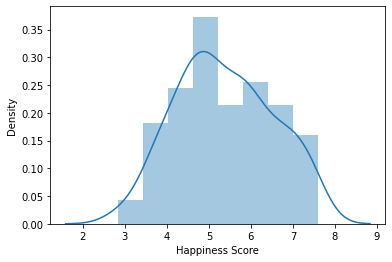

In [92]:
sns.distplot(df['Happiness Score'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

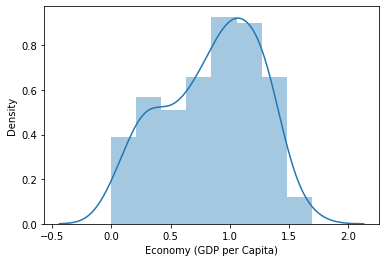

In [93]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

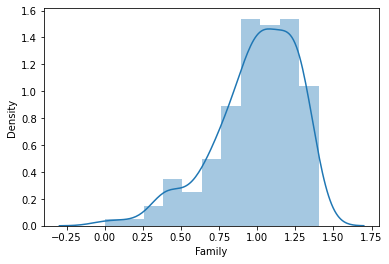

In [94]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

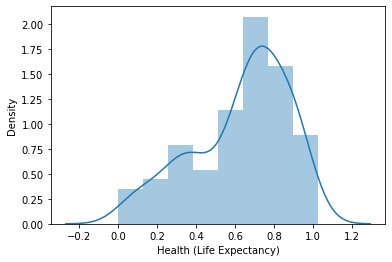

In [95]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

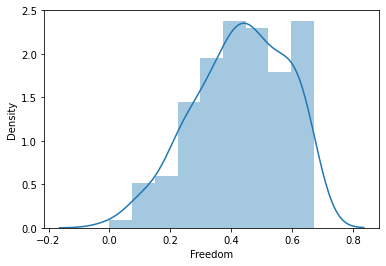

In [96]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

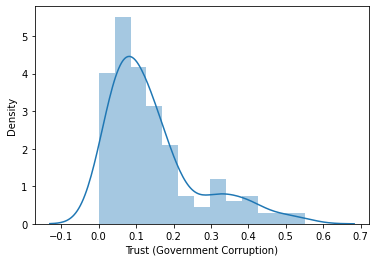

In [97]:
sns.distplot(df['Trust (Government Corruption)'])

# removing  uncorrelated data as threshold to be +/-0.2 and having more outliers

In [125]:
df = df.drop(['Standard Error','Generosity','Trust (Government Corruption)'],axis=1)


In [126]:
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual,Category
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,2.51738,High
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,2.70201,High
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,2.49204,High
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,2.46531,High
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,2.45176,High
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.67042,Low
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,1.63328,Low
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.32858,Low
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,1.83302,Low


# removing columna which having string data (not helpful in predicting the model)

In [127]:
df = df.drop(['Country','Region','Category'],axis=1)


In [128]:
df

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,2.45176
...,...,...,...,...,...,...,...
153,154,3.465,0.22208,0.77370,0.42864,0.59201,0.67042
154,155,3.340,0.28665,0.35386,0.31910,0.48450,1.63328
155,156,3.006,0.66320,0.47489,0.72193,0.15684,0.32858
156,157,2.905,0.01530,0.41587,0.22396,0.11850,1.83302


# split the data

In [142]:
X = df.iloc[:,1:]
y = df.iloc[:, 0]


In [164]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Standard Linear Regression

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

scaling feature

In [166]:
scaler = StandardScaler().fit(X_train) 
S_X_train = scaler.transform(X_train) 
S_X_test = scaler.transform(X_test) 

In [167]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Standard linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Standard linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Standard linear regression R2 =  0.9726837717991766 

Standard linear regression coefficients :
Happiness Score : -29.426683357814206
Economy (GDP per Capita) : -10.231668557661521
Family : -10.84833899986615
Health (Life Expectancy) : -16.528501489269157
Freedom : -10.701542046193625
Dystopia Residual : -8.67701042480346


# Ridge Regression 

In [168]:
ridge_reg = Ridge().fit(S_X_train, y_train)
y_pred = ridge_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Ridge linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Ridge linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Ridge linear regression R2 =  0.9695065683547538 

Ridge linear regression coefficients :
Happiness Score : -29.426683357814206
Economy (GDP per Capita) : -10.231668557661521
Family : -10.84833899986615
Health (Life Expectancy) : -16.528501489269157
Freedom : -10.701542046193625
Dystopia Residual : -8.67701042480346


# Lasso Regression 

In [169]:
lasso_reg = Lasso().fit(S_X_train, y_train)
y_pred = lasso_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Lasso linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Lasso linear regression R2 =  0.9744843752343129 

Lasso linear regression coefficients :
Happiness Score : -29.426683357814206
Economy (GDP per Capita) : -10.231668557661521
Family : -10.84833899986615
Health (Life Expectancy) : -16.528501489269157
Freedom : -10.701542046193625
Dystopia Residual : -8.67701042480346


# Conclusions

--:Our best-performing model was standard Lasso regression using standardized data with some margin. This model gave an R2 score of 0.974 .

-: Our ridge regression model, also using standardized data, gave similar results.

# Things to Notice

While our work yields quite promising results,
human happiness is most definitely a goal more intricate than given measures in data.
For machine learning engineers, many exciting paths are open for investigation.
For instance, while the dataset we used was the largest, most comprehensive,
and least biased dataset available to us, a future model could make use of a more expansive dataset with 
additional features including a country’s political condition, the status of its minorities, and 
the actual economic status of its citizens

There is no path to happiness: happiness is the path :- Gautama Budha